In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib

from matplotlib import pyplot as plt

<h1> ■ 데이터 불러오기

In [3]:
period_1 = pd.read_excel('period1.xlsx')
period_2 = pd.read_excel('period2.xlsx')
period_3 = pd.read_excel('period3.xlsx')

<h1> ■ 데이터 형태 보기

In [4]:
print('period_1의 데이터 형태 : ', period_1.shape)
print('period_2의 데이터 형태 : ', period_2.shape)
print('period_3의 데이터 형태 : ', period_3.shape)

period_1의 데이터 형태 :  (108620, 102)
period_2의 데이터 형태 :  (75881, 102)
period_3의 데이터 형태 :  (30382, 102)


# ★ LDA Topic Modeling

In [5]:
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
# from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re
import gensim
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from gensim.models import CoherenceModel

In [7]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# ■ Period 1

In [8]:
texts = []
sentence1 = [] # 특정 토픽이 포함된 문서를 추출 시 사용

stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan']
for w in period_1['Full Description']:
    i = 0
    try:
        raw = w.lower()
    except AttributeError:
        continue
    else:
        sentence1.append(w)
        raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if (not i in stop_words) & (not i in stop_words_2)]
    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)
corpus1 = [dictionary.doc2bow(text) for text in texts]

# ★ 최적의 토픽 개수 설정

<h1> Perplexity ↓

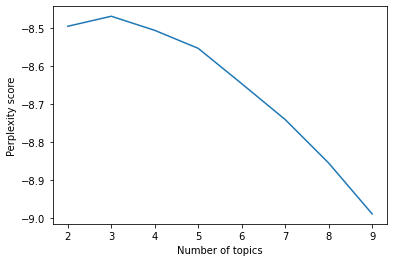

In [10]:
perplexity_values = []

for i in range(2, 10):
    ldamodel1 = gensim.models.ldamodel.LdaModel(corpus1, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel1.log_perplexity(corpus1))

x = range(2, 10)

plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

# Coherence ↑

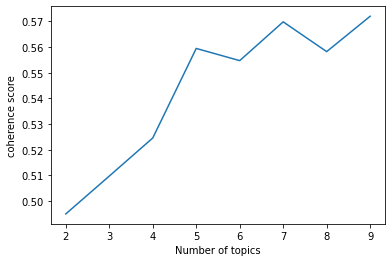

In [11]:
coherence_values = []
for i in range(2, 10):
    ldamodel1 = gensim.models.ldamodel.LdaModel(corpus1, num_topics = i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel1, texts = texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

# ■ 최적의 토픽 개수 설정 = 8

In [12]:
ldamodel1 = gensim.models.ldamodel.LdaModel(corpus1, num_topics=8, id2word = dictionary, random_state=456)

# ■ 토픽 출력

In [13]:
ldamodel1.print_topics(num_words=20)

[(0,
  '0.015*"user" + 0.014*"business" + 0.014*"marketing" + 0.012*"service" + 0.011*"app" + 0.011*"platform" + 0.010*"web" + 0.010*"mobile" + 0.009*"website" + 0.009*"digital" + 0.008*"customer" + 0.008*"social" + 0.007*"development" + 0.007*"content" + 0.007*"design" + 0.007*"medium" + 0.006*"online" + 0.006*"video" + 0.006*"application" + 0.005*"solution"'),
 (1,
  '0.020*"business" + 0.014*"service" + 0.012*"digital" + 0.012*"platform" + 0.010*"market" + 0.009*"blockchain" + 0.008*"technology" + 0.008*"company" + 0.008*"solution" + 0.007*"financial" + 0.007*"client" + 0.006*"management" + 0.006*"investment" + 0.006*"industry" + 0.005*"global" + 0.005*"customer" + 0.005*"team" + 0.005*"based" + 0.004*"asset" + 0.004*"payment"'),
 (2,
  '0.028*"ai" + 0.027*"learning" + 0.025*"platform" + 0.014*"intelligence" + 0.013*"customer" + 0.013*"machine" + 0.011*"artificial" + 0.010*"online" + 0.007*"training" + 0.007*"sale" + 0.007*"insight" + 0.006*"based" + 0.006*"using" + 0.006*"analytics

# ■ 문서 및 토픽 포함 비율 출력

In [16]:
for i, topic_list in enumerate(ldamodel1[corpus1]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(1, 0.67491907), (4, 0.062008604), (7, 0.24673013)]
1 번째 문서의 topic 비율은 [(2, 0.10285477), (3, 0.1534996), (4, 0.35989788), (6, 0.36744258)]
2 번째 문서의 topic 비율은 [(0, 0.34578317), (2, 0.26214537), (4, 0.12987055), (5, 0.24216782)]
3 번째 문서의 topic 비율은 [(1, 0.690212), (2, 0.1378389), (4, 0.15738267)]
4 번째 문서의 topic 비율은 [(0, 0.21792749), (4, 0.7673036)]


<h2> ★ 특정 토픽이 포함된 문서 출력(설정 : 비율 설정)

In [19]:
for i, topic_list in enumerate(ldamodel1[corpus1]):
    if i==10000:
        break
    if (topic_list[0][0] == 3) & (topic_list[0][1] >= 0.5):
        print('{0}번째 문서'.format(i+1), end='\t')
        print(topic_list)
        print()
        print(sentence1[i])
    else:
        continue
    print('=' * 80)

323번째 문서	[(3, 0.68700486), (4, 0.296653)]

Stellic (previously known as Metis) was founded by Carnegie Mellon undergraduates after getting frustrated by the clunky, complicated tools they were given to plan their academic journey. Under the mentorship of university advisors who were equally frustrated with the existing degree planning process, the team pursued their goal of building a planner with intelligence and interation. The project received appreciation from the campus community and won Research Awards – convincing the team to build a company with a purpose to provide student-built tools to universities worldwide.
355번째 문서	[(3, 0.68349683), (4, 0.28228125)]

AVA unlocks the green thumb in anyone by making gardening as easy as hitting the download button. AVA Byte is a smart garden that uses seed pods and software to grow plants!
714번째 문서	[(3, 0.8591083), (4, 0.12003351)]

FastVisa builds the platform to streamline Immigration and Visa process, making immigration and visa preparat

5553번째 문서	[(3, 0.7028003), (7, 0.25551414)]

LearnCoach was created to help students thrive in secondary school. LearnCoach supports 100,000 students per year with online lessons, activities and government-approved exams.
5599번째 문서	[(3, 0.7872833), (4, 0.18851067)]

Ruvna allows schools to locate and account for their students in real-time during an emergency. When there is an emergency in a school, it’s incredibly difficult and time-consuming to identify which students are safe and which students need attention. Ruvna solves this problem in an amazingly simple way. By simply having teachers indicate which students they have, Ruvna shows administrators and law enforcement immediately which students need attention.
6055번째 문서	[(3, 0.5251539), (4, 0.3359165), (5, 0.04598577), (6, 0.048066236), (7, 0.039930027)]

Clora is an intelligent platform that matches life science companies with flexible, on-demand expertise. Clora is faster, more cost-efficient, and yields higher quality on-demand 

<h1> ■ Period 2

In [20]:
texts = []
sentence2 = []

stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan']
for w in period_2['Full Description']:
    try:
        raw = w.lower()
    except AttributeError:
        continue
    else:
        sentence2.append(w)
        raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if (not i in stop_words) & (not i in stop_words_2)]
    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)
corpus2 = [dictionary.doc2bow(text) for text in texts]

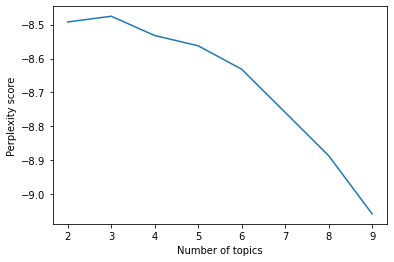

In [21]:
perplexity_values = []

for i in range(2, 10):
    ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel2.log_perplexity(corpus2))

x = range(2, 10)

plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

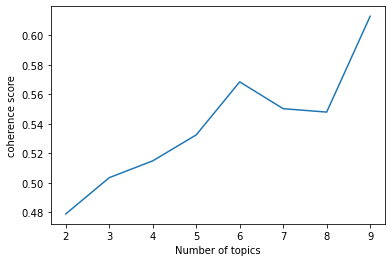

In [22]:
coherence_values = []
for i in range(2, 10):
    ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics = i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel2, texts = texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

In [23]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=7, id2word = dictionary, random_state=10)

In [24]:
ldamodel2.print_topics(num_words=20)

[(0,
  '0.023*"health" + 0.014*"food" + 0.012*"care" + 0.012*"patient" + 0.012*"medical" + 0.009*"based" + 0.009*"healthcare" + 0.006*"technology" + 0.005*"treatment" + 0.005*"delivery" + 0.005*"payment" + 0.005*"disease" + 0.005*"platform" + 0.005*"restaurant" + 0.004*"app" + 0.004*"service" + 0.004*"device" + 0.004*"founded" + 0.004*"wellness" + 0.004*"product"'),
 (1,
  '0.014*"home" + 0.011*"car" + 0.011*"vehicle" + 0.006*"driver" + 0.006*"mobility" + 0.006*"electric" + 0.005*"repair" + 0.004*"transportation" + 0.004*"city" + 0.004*"battery" + 0.004*"hair" + 0.004*"fleet" + 0.004*"con" + 0.003*"charging" + 0.003*"station" + 0.003*"storage" + 0.003*"air" + 0.003*"men" + 0.003*"material" + 0.003*"dan"'),
 (2,
  '0.011*"product" + 0.011*"online" + 0.011*"platform" + 0.011*"brand" + 0.010*"user" + 0.010*"content" + 0.009*"app" + 0.008*"medium" + 0.008*"social" + 0.007*"customer" + 0.007*"website" + 0.006*"video" + 0.006*"create" + 0.006*"experience" + 0.006*"mobile" + 0.005*"game" + 0.

In [26]:
for i, topic_list in enumerate(ldamodel2[corpus2]):
    if i==1000:
        break
    if (topic_list[0][0] == 2) & (topic_list[0][1] >= 0.5):
        print('{0}번째 문서'.format(i+1), end='\t')
        print(topic_list)
        print()
        print(sentence2[i])
    else:
        continue
    print('=' * 80)

16번째 문서	[(2, 0.50266147), (5, 0.07266183), (6, 0.41806358)]

Whether you trade stocks such as Microsoft, Apple or Ford; forex pairs such as EUR/USD, GBP/USD, or USD/JPY; futures such as E-mini S&P 500, Crude Oil WTI, or Natural Gas; or even cryptocurrencies such as Bitcoin, Litecoin, or Ethereum. TRADR is the clothing brand for day traders, swing traders, and investors alike. Offering a wide range of clothing products from shirts to hoodies and even accessories,  they have something to express yourself in the correct manner. TRADR started out as a simple t-shirt design which turned out to be a "winning" shirt every time their CEO would wear it when day trading stocks to a worldwide brand that days traders, swing traders, and investors wear daily. It has been seen on many popular forums and individuals. Setting itself a great establishment in social media as well, TRADR continues to live up to its slogan, "Apparel for the bulls."
36번째 문서	[(2, 0.5724599), (6, 0.39887798)]

Revute is onli

635번째 문서	[(2, 0.9652682), (3, 0.020966105)]

Superfeed Technologies develops customized news and information feed-based applications for consumers and businesses. Superfeed Technologies introduces Superfeed,  an unbiased, personalized outlet for real news curating all of your favorite sources in one place. See only the news and information you want. Combine all of the user's interests and content into one easy-to-use app, and prioritize all their favorite topics and sources into Minifeeds®. Minifeeds fit exact interests in order to take back control and stay up to date with favorite publishers, content creators, news outlets, and influencers.
657번째 문서	[(2, 0.900513), (4, 0.07561149)]

Stick & Ball TV is a baseball-focused OTT streaming platform featuring the best coaches, players and premium brands in baseball today. Stick & Ball TV creates and curates baseball training content, on-brand partner content and original lifestyle content.
680번째 문서	[(2, 0.63560385), (3, 0.26275557), (5, 0.0

1265번째 문서	[(2, 0.6783952), (5, 0.29921117)]

Bee TV, a technology company focused on the visualization of agricultural knowledge, translates the original, boring, and difficult-to-understand agricultural knowledge into a simple, easy-to-understand form in a short video format, providing useful, interesting, and understandable agriculture. Knowledge, let "agricultural knowledge visible"!
1281번째 문서	[(2, 0.6113923), (3, 0.044109143), (4, 0.18531294), (5, 0.15277407)]

My job is to help make sure the content you publish is designed to accomplish your business's strategic goals. Sometimes that means consulting with you and then delivering a content strategy that can be as detailed as you like.  Sometimes it means writing the content for you myself, and sometimes it means managing a team of writers. It almost always means playing the role of chief hole-poker...being that annoying person in the back of the room who's always shouting, "But what about...?"​ That's only because, as an outsider, 

1897번째 문서	[(2, 0.525373), (3, 0.24850468), (5, 0.12367978), (6, 0.09329469)]

Blocklike is a blockchain original content media service provider, positioned for in-depth observation and value transfer. So far, more than 120 original articles have been published, covering real-time information, in-depth reports, hotspot analysis, and interviews with people in the blockchain industry. The vertical digital "digital securities" direction is one of the few media in the world that specializes in reporting news in this field. It has become an important channel for information acquisition and exchange in the global digital securities industry.
1945번째 문서	[(2, 0.8329869), (3, 0.15349485)]

We empower E-Commerce using computer vision technology. It's an AI Powered platform to transform visual content into shoppable engaging assets in a frictionless automated way. Our solutions Visual Search, Visual Recommendation, Shoppable Video, Shoppable Banner are being used to shorten the path to action acros

2576번째 문서	[(2, 0.9463448)]

EcomVids' video ads combine traditional direct response advertising with user-generated content to create authentic, engaging video content.
2577번째 문서	[(2, 0.9625108)]

Off Leash Studios producers, animators, photographers and artists who work with brands, production partners and agencies big and small to craft visual content that engages your audience, moves consumers, and demands action.
2591번째 문서	[(2, 0.5098048), (4, 0.4480648)]

Create the world's first on-demand knowledge economy by bringing employment to all corners of the world & provide hand-picked and vetted answers to the users. 
2614번째 문서	[(2, 0.501844), (3, 0.19914639), (5, 0.26886508)]

CyberHub Podcast aims to provide substantive and quality content that’s more than headlines or sales pitches. They want to be a valuable source to assist those cybersecurity practitioners in their mission to keep their organizations secure.
2619번째 문서	[(2, 0.6160396), (3, 0.05520017), (5, 0.31541988)]

CANI was fo

3215번째 문서	[(2, 0.58267635), (5, 0.2841992), (6, 0.1110612)]

Green Apple Design company located in Carlow, Ireland that offer Graphic design, logo and brochure design services to Carlow, Kilkenny, Kildare and Waterford locations in Ireland. Our knowledge and expertise in graphic design, print, promotions and web design ensure distinguished production and communication.
3293번째 문서	[(2, 0.5838976), (3, 0.12088728), (6, 0.2739656)]

Digital Wines provides marketing and communication services to wine-related businesses. It creates and promotes the winery's digital identity online. It develops the Etilika.it, is a website and e-commerce specialized in the sale of wines and spirits. It was founded in 2018 and is based in Rome, Latium.
3346번째 문서	[(2, 0.8912909), (4, 0.06893501)]

NUNECO is the worlds first online newspaper without articles. Dossiers show the news in a more structured, more balanced and more tailored manor. That way you can easily keep an oversight and develop your own opinion 

3867번째 문서	[(2, 0.8006992), (5, 0.16339266)]

Staello developed a tool to help businesses get more reviews on popular sites like facebook and google. By doing this, they help your business gain recognition as a leader in your field and show up as the obvious choice in online search results.
3882번째 문서	[(2, 0.6933357), (5, 0.2877988)]

Luowa develops software and creates digital media. Website development, when done correctly, is seamlessly integrated into the website. Their starting point is to design a website around content, not the other way around. Therefore, they are happy to provide content production services for all online projects, which are carried out in conjunction with the graphic designer. There are a number of resources online about search engine optimization.
3886번째 문서	[(2, 0.8181368), (3, 0.13939008)]

SHOPnROAR is a next generation artificially intelligent comparative shopping engine where consumers can search for and compare millions of Products for the ultimate compar

4470번째 문서	[(2, 0.8530617), (4, 0.03487067), (6, 0.09659637)]

Jawonsi is a streaming platform that allows users to upload, view, and share videos contents. Get Paid For Your Video Contents. Are you a content creator, skit maker, or journalist? Rev up growth, and scale seamlessly. With Jawonsi, you can sell your videos directly to your fans, offering them an option to rent, buy or subscribe to your videos. You can also promote them using social media, emails, and newsletters.
4472번째 문서	[(2, 0.6603985), (5, 0.09859985), (6, 0.22670239)]

Welcome to MISSION14 LTD! We bring you the revolution of online shopping! We design the perfect platform for online brands to grow and thrive by increasing foot traffic through our ingenious content marketing solutions. M14 provides effectual Content Marketing and IT Services to boost your brands and startups. By connecting vendors to our highly responsive shoppers, we help the brands to generate greater revenue and gain visibility globally!
4481번째 문서	[(

5103번째 문서	[(2, 0.89288855), (3, 0.08966116)]

Enabling personalised shopping experiences that blend the online and real worlds. Percept Imagery has developed a unique augmented reality platform called Sprie® that enables retailers to personalise online shopping experiences by allowing shoppers to try products in the real world before buying them. The AR solution easily integrates into eCommerce websites or social pages making AR more accessible and requiring no app download.
5152번째 문서	[(2, 0.9131609), (4, 0.06570712)]

GoEthical is the UK’s first dedicated ethical marketplace and lifestyle app bringing ethical, artisan and preloved products under one roof.  We bring together a community of buyers and sellers with the same interests and values in sustainable living; giving them a platform and an all-in-one marketplace to showcase their products, reach relevant audiences and be part of a passionate community.
5155번째 문서	[(2, 0.52435297), (3, 0.24645054), (6, 0.21374795)]

ICOFY Dapp is th

5729번째 문서	[(2, 0.63630414), (4, 0.11336644), (5, 0.13636039), (6, 0.1046337)]

Threadbase allows anyone, anywhere to easily build a Reddit, Product Hunt, or any other vote-based community they wish they could make. No engineering experience required. Owners can either create a free community or subscribe to one of our more robust tiers, which provide features ranging from customization of themes to the Threadbase team creating iOS and Android apps for a community. Our goal is to unlock more authentic communities in the world while providing scalable income streams for community owners.
5747번째 문서	[(2, 0.53355336), (4, 0.45210794)]

Scholars.shop allows students to raise money for their education through crowdfunding and scholarships. Scholars.shop allows any individual and organization to create mission driven scholarship. The site then markets the scholarship through an easily searchable database, hosts the application built by the sponsor, and allows for easy award selection by our bu

6327번째 문서	[(2, 0.7903704), (4, 0.13886318), (6, 0.060528293)]

In a world where you want to be available on as many platforms as possible and tell as much as you can about you at once, a classic business card might not fit everything you wish to write on it. ConnSuite, comes with an online approach by creating a unique personal business card for you to share with your business connections! It allows you to add your already created accounts and networks, and also write or link to articles that showcase your work and achievements. This way, a client or partner will visit your profile once, and have access to all the great stuff you wish to show them. After they will be amazed by your work, they can choose a platform/network you both spend time on to approach you!  
6402번째 문서	[(2, 0.8163353), (3, 0.14785647)]

RetainIQ is an e-commerce marketing company that works with global brands and helps to grow online sales. It enables brands to segment and sends personalized messages powered by AI 

6941번째 문서	[(2, 0.5495254), (3, 0.17867658), (5, 0.2563273)]

Vetnos is a U.S. based company that offers a 100% legal Sports Matchup Game. It was created by some of the top talents in sports gaming in conjunction with leading U.S. based mobile and internet technologists. Its technology team has developed mobile platforms for many of the world’s leading brands. Vetnos is committed to continuing the development of the most engaging and secure platform and games. Vetnos is headquartered in New York, New York.
7002번째 문서	[(2, 0.56498957), (4, 0.4123072)]

Surfboard is a geolocation video-sharing application. Surfboard’s mission is to create a platform where users can share their adventures freely within their respective communities. Surfboard strives to promote a welcoming environment where everyone can express themselves in a fun and engaging way. Use Surfboard to connect with people nearby and see the most exciting things happening in your area.
7003번째 문서	[(2, 0.6831291), (3, 0.28570694)]


7549번째 문서	[(2, 0.63605833), (3, 0.24818277), (4, 0.05365615), (5, 0.05162166)]

Quibi is a media company that develops media content designed for smartphones. The company is focused on the core audience, producing inspiring shows for an intuitive, mobile-first platform, and creating a culture where everyone is heard. Its content is made specifically for mobile devices and can be viewed in either horizontal or vertical video, with the user able to shift to one or the other within the same video. It was founded in 2018 and is headquartered in Los Angeles, California.
7571번째 문서	[(2, 0.64488924), (3, 0.054703042), (5, 0.1655282), (6, 0.120564416)]

Geer™ is the first platform that enables blue-chip brands and video game publishers to sell NFT-based assets for use by players in games.. Geer™'s subsidiary, NFT Pro™ users Geer™ commercial-grade NFT standard to issue NFT collectibles directly to consumers.
7616번째 문서	[(2, 0.506838), (3, 0.11483759), (4, 0.15611751), (5, 0.21025318)]

Mondrian L

8276번째 문서	[(2, 0.8947309), (5, 0.07267901)]

Endlist aims to empower everyone especially content creators in sharing their passions and expressing their views to the world since we have the "listicle" feature in our app wherein you can add more details to your photo captions per image.
8280번째 문서	[(2, 0.51255625), (3, 0.23018505), (5, 0.2056894), (6, 0.04375716)]

CryptoUnify is the first platform that contains all the main services, essential for lovers of Cryptocurrencies. A unique site in continuous evolution, designed to meet all the needs of users, with tools and solutions developed by experts and industry professionals, who live the world of Cryptocurrencies every day just like. CryptoUnify was born from the need to be able to manage all its cryptocurrencies from a single interface, in an easy and effective way. They are traders and a computer scientist, the goals they wanted to achieve were to create a simple system that would aggregate all the main information and services, in o

8941번째 문서	[(2, 0.946425)]

Hugecount is the best social sharing network. Easily create a slideshows, ranked lists, trivia quizzes, polls and stories using your own photos, videos, and music.
8943번째 문서	[(2, 0.83671325), (5, 0.11560381)]

Rogtechs is a Tech blog, here How-to tech, Tricks and Tips, Tech solutions, Apps recommendation, Gadgets reviews, and similar topics get covered.
8962번째 문서	[(2, 0.6050753), (4, 0.1367275), (6, 0.22242104)]

We're sharing Domain Name knowledge, Domain name Deals and Coupons for Domainers, Domain investors, Webmasters, Bloggers, Business owners, and everyone.
8977번째 문서	[(2, 0.7086137), (5, 0.26270694)]

WPITECH is a free WordPress resource site for Beginners and Advanced. WPITECH was founded in January 2018. The main goal of this WordPress & Marketing site is to provide tips, tricks and hacks that other WordPress resources allows WordPress beginners to improve their websites
8981번째 문서	[(2, 0.9167664), (5, 0.0702015)]

Mirror Herald is a UK-based independe

9550번째 문서	[(2, 0.9820764)]

CouponXOO is known as a huge online coupon database for customers who shop online. At CouponXOO, you can find everything. Exactly, everything related to thrift shopping, discounts, promotions, gifts.  CouponXoo is not only a place of providing coupon codes to consumers but also a very potential space of promoting and spreading brand presence. This approach helps vendor increase their sales while their customers have more choices in shopping. Additionally, instead of buying only at the major sites, now online shoppers can find coupons of their favorite stores easily.
9595번째 문서	[(2, 0.7720779), (3, 0.18317162)]

Love Design is an enterprise content creative cloud platform providing online photo editing and graphic design tools for designing.
9599번째 문서	[(2, 0.5340015), (3, 0.440522)]

Docupilot is a Document Automation, Document Generation software. Docupilot lets you create documents from intelligent templates and data and sends the created documents as email 

10239번째 문서	[(2, 0.77187675), (6, 0.19812283)]

Link Commerce is a state-of-the-art patented platform that provides you with the largest online mall in your country! Shop globally on over 250 top online retailers in the US and UK, delivered locally in your service area.
10242번째 문서	[(2, 0.8149947), (4, 0.043851905), (6, 0.12594065)]

Provider of an online marketplace designed to offer on-demand consumer products. The company's online marketplace offers an easily navigable user interface, product catalogue, authentic products, cash on delivery and 30-day exchange or return policy, enabling consumers to find and create unique, personalized and creative merchandise like shirts, mugs, calendars, keychains, diaries and other items.
10275번째 문서	[(2, 0.5163394), (3, 0.10317472), (4, 0.28674126), (6, 0.079424)]

Ollie Sports is a youth sports culture with meaningful data for every player in every game. In addition to its free team management app, parents, coaches, and players can now know exactly

10898번째 문서	[(2, 0.7123634), (4, 0.07990096), (5, 0.18622583)]

Ellipse Data Ltd is a sports analytics company comprising of CricViz, Stuart Farmer Media Services (SFMS) and TennisViz. Their aim is to engage fans - new and old - by using data to explain what is happening and what might happen during any given sporting event. They sell their products to broadcasters and the media around the world.
10904번째 문서	[(2, 0.6009627), (3, 0.07020523), (5, 0.30017242)]

Ruby Games is a mobile game publisher and studio based in İzmir, Turkey. With a team consisting of passionate and creative minds, our aim is to create mobile games that can be enjoyed by anyone!
10907번째 문서	[(2, 0.7523858), (6, 0.21182783)]

Playary is music and video streaming services.  Playary collects and organizes music videos and short movies from Youtube and serves with beautiful UI. Indie artists share their all works in Playary Music for free.
10916번째 문서	[(2, 0.8196907), (4, 0.15535001)]

Cash Live is a mobile poker and soci

11520번째 문서	[(2, 0.9547768)]

LinkPe brings the top headlines of the day for you. Here you can read daily news in various categories such as Entertainment, Technology & Gadgets, World, Sports, and Business from multiple sources in one place.
11521번째 문서	[(2, 0.63378614), (4, 0.3350763)]

Dinvo, is our name for Money back, that we provide for you plus discount coupons and offers, all in one place. Have you thought about doing your shopping online and getting a portion of the money back, how much can you save in a year? Sign in and start saving.
11532번째 문서	[(2, 0.6129924), (4, 0.36053184)]

At Our Big Day, our goal is to enrich the wedding experience with the technology we provide. Using our platform, couples can share their weddings with a beautiful website, get connected with relevant vendors, learn about Chinese traditions, send lai see online and much, much more.
11577번째 문서	[(2, 0.6092832), (3, 0.1487661), (6, 0.21275577)]

1K Kirana Bazaar is an offline to online neighbourhood store (

12154번째 문서	[(2, 0.8098185), (4, 0.14999206)]

Yada is a platform for teens to share and gather advice. Our app allows for the easy creation and collection of “threads,” which are tappable cards that pair written content with expandable media.
12166번째 문서	[(2, 0.8685836), (6, 0.10485143)]

Letsinfluence.io is a platform connecting brands and influencers. We enable brands to reach the right audiences by matching them with the right influencers resulting in massive growth. We help social media enthusiasts and creators to sell branded content and in the process become a brand themselves.
12181번째 문서	[(2, 0.5187954), (3, 0.44856676)]

Springkode is an E-commerce company that specializes in the fields of apparel and fashion. It offers a web-based fashion marketplace that connects the final customer to a network of independent European factories. The company was founded in 2018 and headquartered in Matosinhos, Porto.
12183번째 문서	[(2, 0.590846), (6, 0.37650505)]

Cryptic Legends Limited is a game

12791번째 문서	[(2, 0.75790215), (3, 0.15639697), (4, 0.06884981)]

Gist Technology is a personal shopping assistant application designed to track, follow and monitor shopping habits. It operates a platform to view a portal of curated content depicting images, product recommendations, and reviews to make informed purchasing decisions, enabling users to see what their friends and family own and know whether it is worth it to own or not.
12821번째 문서	[(2, 0.8661954), (6, 0.107260995)]

Friended helps people experience friendship instantly, meet new friends and improve their friendships. Users have shared numerous testimonials of how Friended has made them happier and changed their lives. 61% of Friended users feel less alone and 67% feel more confident around others after using Friended.
12845번째 문서	[(2, 0.5272685), (4, 0.42785907)]

The all-in-one event platform serving 1,200+ festivals and conventions with tools to manage artists, vendors, exhibitors, sponsors, volunteers, and so much more.
1

13385번째 문서	[(2, 0.7296419), (3, 0.1361164), (4, 0.05990422), (5, 0.059547987)]

GreenPark Sports provides digital experiences and games for sports and esports fans. Its flagship product is a native, free-to-play mobile game played over the top of sporting events, where fans battle to become the undisputed “Best Fans” of their league and season. The company was founded in 2018 and is headquartered in Burlingame, California.
13418번째 문서	[(2, 0.9113014), (4, 0.061101004)]

Scener is the leading social viewing platform for streaming services. Built to provide a “social layer” for streaming TV shows and movies, groups of viewers, large and small, can synchronize video playback alongside video and text chat.
13479번째 문서	[(2, 0.5298801), (3, 0.14282808), (4, 0.0903944), (5, 0.22907788)]

The Swiftly® digital platform empowers retailers to grow sales and build loyalty, while enabling brands to reach more shoppers through retail media networks. Swiftly’s technology harnesses the power of AI to he

13971번째 문서	[(2, 0.6626736), (3, 0.1448959), (4, 0.1651694)]

Doppio is a conversational game studio, creating the next big step in entertainment: voice and narrative-driven games. Check out our titles, The Vortex and The 3% Challenge, on your Google Assistant or Amazon Alexa.
14004번째 문서	[(2, 0.60606724), (3, 0.31408763), (4, 0.068379514)]

AISpotter introduces a new video analytics service, which is based on AI. Their service is accurate, cost efficient and fast. It provides a complete and reliable view of the pitch for coaches. The service combines off-the self-cameras, data in cloud, spot the main events from the pitch and creates an automatic video-clip collection of the match. Main events can be easily gathered and spotted for creating a video-clip collection of the match. From the whole view pitch coaches can have tactic, complete and accurate data from their team.  
14032번째 문서	[(2, 0.5256163), (3, 0.16666307), (4, 0.12755655), (5, 0.17715077)]

Ad Fontes Media, Inc. is a company 

14586번째 문서	[(2, 0.6302857), (3, 0.120080076), (4, 0.053644627), (6, 0.18187515)]

Long sword is a spicy sauce condiment brand. Its main products are abalone scallop XO seafood secret fresh spicy sauce. Its products are sold through WeChat public number and offline entity super-channels, while providing logistics, after-sales, 24 hours. Fast refund and other services.
14604번째 문서	[(2, 0.5697911), (5, 0.18300141), (6, 0.21860975)]

DisputeClick is a promotion services portal that offers an innovative advergame marketing and advertising tool. Through the cooperative system, each partner company makes available some products or services with this super discount so that consumers can have fun disputing.
14607번째 문서	[(2, 0.6840708), (5, 0.27351475)]

IE Tech Tools is your home for technology, digital marketing, application, software, web design, gadgets, games and daily technology news.
14608번째 문서	[(2, 0.6418494), (4, 0.12814775), (6, 0.20146286)]

tocal is a place for tocalist to hear about t

15170번째 문서	[(2, 0.722309), (5, 0.112891726), (6, 0.1587393)]

Staping Co., Ltd. is a AI Fashion shopping platform Startup company based in Seoul, Korea. We have a CBIR Image Search Engine and Mobile AI Fashion Shopping app platform. User can search a product by photo with share, color, pattern in 1 second. Staping app (2.0 version) provide more than 3,000 online fashion shopping malls in one place, the Staping app. New product data is automatically updated every day. AI product recommendation function, fashion SNS page provided. No sales fees from the shopping mall vendor. Advertisement of online products is the revenue model. If Vendor want to host ad of his products, he can pay the ad fees and host his product ads. We are looking for business partners who are interested in launch this mobile app service in China, Japan, Europe, India, Southeast Asia, USA, etc. Also, looking for investor who are interested in invest into our company.
15187번째 문서	[(2, 0.8123813), (3, 0.16448277)]

Class

15810번째 문서	[(2, 0.6946149), (5, 0.04701716), (6, 0.24991697)]

The Signed Sports Wear Website is an online portal bringing you all the best sports deals currently available from a network of suppliers that we have brought together under one roof. We often have special deals and offers not available elsewhere. We are officially registered partners with Amazon. By linking in with this worldwide established company, you receive full legal warranty cover and guarantees, backed by Amazon. You can also be sure we are sourcing products at the best available prices. It also means than rather than having to search through numerous other websites, you only need pay us a visit. We have thousands of items in stock and we are constantly updating our catalogue with new products from many different sources across the country so you don’t have to. Why not add us to your bookmarks, so you don’t miss that new item you’ve been after.
15870번째 문서	[(2, 0.95701027)]

Panya Studios is a mixed interactive medi

16357번째 문서	[(2, 0.5796774), (5, 0.30761912), (6, 0.080766924)]

Trendmedia.xyz is the most interesting and discussed news on the Internet right now. We analyze the largest media and social networks, ranking information on the time of appearance, topics and the degree of relevance.
16394번째 문서	[(2, 0.632765), (4, 0.24496661), (6, 0.09605945)]

Spencer and York is a top online children's store offering personalized, classic styles with a modern flair. Affordable and unique without sacrificing quality, our children's clothing, gifts and accessories are made just for you! 
16411번째 문서	[(2, 0.74654454), (3, 0.0542437), (5, 0.18129548)]

Italic is building the modern "everything store." We empower consumers to shop quality goods straight from the same manufacturers as top brands but at 50-80% lower prices. For manufacturers, we provide the tools, distribution, and technology necessary to access a global customer base to build a completely new revenue stream.
16431번째 문서	[(2, 0.5144474), (3, 0.0

16963번째 문서	[(2, 0.75618535), (4, 0.20813438)]

Goodtalk lets you be a fly on the wall in real text conversations between real people in real-time. For verified people with something to say, Goodtalk helps you be heard instantly as you text with your peers, troll-free, without interruptions. Social media wasn't built for conversations; Goodtalk was.
17005번째 문서	[(2, 0.56338567), (3, 0.31253907), (6, 0.106184654)]

Sently is a SAAS solution to engage your community on different conversational interfaces (Messenger, WhatsApp, Voice Assistants, Web ...). Thanks to a plug-and-play chatbot creation tool, easy to use and quick to set up, Sently addresses business teams to enable them to easily interact with their audience on new communication channels.
17008번째 문서	[(2, 0.6181147), (3, 0.33717567)]

VisionAppster makes it simple and free. Whether you’re developing a computer vision app, image analysis, or looking to monetize your image analysis code, VisionAppster is the only platform you need.


17560번째 문서	[(2, 0.6840568), (6, 0.2737389)]

Use modern methods of marketing to grow your business. Website visits, registrations, surveys, reviews and comments, likes on social media and much more.
17578번째 문서	[(2, 0.5087993), (3, 0.13249037), (4, 0.17289169), (5, 0.044358116), (6, 0.13855335)]

Wedio is the new European sharing community for  Filmmakers and Photographers. Wedio gives creators the opportunity to access their desired gear and financial flexibility in order to focus on their craft. Wedio provides creators with the essentials in order to share gear safe and smoothly. This implies excellent insurance conditions, thorough user verification, a rating system, an easy suited communication system, a user-friendly platform, and a transparent environment. We make renting easy. By promoting the listed gear and handling the formalities we encourage conveniency towards our lenders. By gathering the supply of local gear in one marketplace, creators are able to make quick and informed

18140번째 문서	[(2, 0.66715974), (6, 0.2951624)]

Nex4, Inc. is a streaming broadcasting entertainment service company, which provides subscription service for streaming Movies, Television series, and live television channels over the internet and Nex4 supported devices.
18143번째 문서	[(2, 0.57907814), (3, 0.40099972)]

We connect screens to inspiration. Our cloud-based streaming technology makes it easy to transform any digital surface into an efficient communication channel. Local companies can book screens anywhere in public for instantly placing powerful messages. We bridge online marketing into the physical world and apply computer vision for performance and analytics.
18144번째 문서	[(2, 0.84568256), (4, 0.1349625)]

Timeburst has created a unique experience for brands to find relative audiences that are outside of digital marketing. Influencers will have unique tools to promote messages for Timeburst advertisers. Front-end users will be engaged in a unique content selection that only inclu

18762번째 문서	[(2, 0.8265402), (4, 0.14714713)]

QuoteMachine is a software to help local retailers turn any in-store conversation into an online sale. When a customer leaves the store without buying, the sales associate sends them a personalized microsite that contains the list of the products they talked about. When the customer is ready, they can then order directly from the microsite. Our microsite converts at 70%.
18827번째 문서	[(2, 0.5879175), (3, 0.11399074), (4, 0.2883556)]

Micro-influencer marketing has never been easier! Join the world’s first advertising community dedicated to connecting businesses and micro-influencers today. Whether you’re a brand or an influencer, MySway is free to join! You’re probably asking, “what is MySway?” MySway is an innovative platform that scores and compares influencers based on performance and engagement using our proprietary algorithm. Influencers are then placed on a leaderboard amongst other influencers in the same topic. Influencers can reach f

19344번째 문서	[(2, 0.90499556), (5, 0.07489413)]

Mont Kiji focuses on the idea of personalization and offers the following: Custom Made Scarf (made-to-order design service), Personalized Scarf (personalizing design by adding  initials or photos) and Limited Edition Scarf (seasonal selection of designs). The scarves are woven, printed and made by the highly skilled, century old artisans in France.
19348번째 문서	[(2, 0.8178213), (5, 0.16720118)]

Helping copywriters around the globe craft better content, and they’re worth making daily use of. Effective content marketing need lots of quality content. That means writing loads of copy. So, to help out we put all the best tools together. This service Enhance creativity, Decrease mistakes, Smooth writing, and Help content writers and marketers to get success on the web.  To write for Social media, SEO content, E-commerce, Blogs, Ads and other conversation materials. YOU CAN BUY THIS BUSINESS
19361번째 문서	[(2, 0.8002602), (4, 0.16718979)]

Pricehub i

19906번째 문서	[(2, 0.9548142)]

La Cave de Tonton Lucien is the first virtual wine shop on Deliveroo. We provide you with the best wines, whenever you want, wherever you are, delivered in under 20’. We are already in Paris and Lille. Check out our website tonton-lucien.com to learn more about us !
19938번째 문서	[(2, 0.7059971), (4, 0.08916119), (6, 0.18184762)]

Safeshop is an E-commerce company that focuses on verifying social media businesses and give these the businesses an opportunity to sell their products through its website. Safeshop aims to create a healthy shopping space for customers by providing verified online merchants with affordable products.
19949번째 문서	[(2, 0.6111759), (5, 0.1779077), (6, 0.18434723)]

Games Revival is a game development agency based in Brazil. We seek to develop games of collective interest, focusing on a personal rank that few can enter. We believe that the selection of the best will arouse a greater interest of the other players.
19950번째 문서	[(2, 0.8487401)

20506번째 문서	[(2, 0.8513388), (4, 0.10400047)]

Uzibox is a web platform that allows users to upload and share videos. Users have the ability to earn from there videos, getting rewarded for their views and followers.
20519번째 문서	[(2, 0.61709327), (5, 0.33518866)]

CHATFLIX is a chat fiction platform merging pop-culture entertainment with reading, evolving and strengthening the reading experience of the millennial generation.
20553번째 문서	[(2, 0.7047726), (4, 0.2786021)]

We are dedicated to helping schools capture the most memorable events in a high school student’s life live and then make them available to rewatch over and over. Complete with mobile, tablet and HD viewing, DVR functionality, Forever Replay, web-based studio, scoreboard functionality, ad revenue, highlight clipping, media distribution, and social media tools - High School Zoom is where fans go to watch High School Sports.
20557번째 문서	[(2, 0.9625952)]

ePackt will meet the demands of modern e-commerce and their customers, ena

21098번째 문서	[(2, 0.7390635), (4, 0.2133725)]

TheRight Messages is your source for Messages. Our goal is to provide our readers with the comprehensive lists of quotes on love, life, relationship, Wishes, Wisdom & Prayers.
21113번째 문서	[(2, 0.63112897), (3, 0.09464943), (4, 0.1832309), (5, 0.07867262)]

Evermée immortalizes personal memories inside high quality jewelry. Their necklaces invisibly carry one single photo memory of your choice. The photo memory is stored on an NFC tag inside a gemstone and can be inspired by hovering the phone over the evermée necklace. In a world where everyone has thousands of meaningless photos on their phones, the evermée necklace turns single photo memories into something of importance again.
21126번째 문서	[(2, 0.7326829), (5, 0.21949945)]

We are a bunch of people channeling our time, efforts into creating best possible solutions for enabling clients to better communicate and reach their target audience digitally.
21140번째 문서	[(2, 0.59212995), (3, 0.22416496

21696번째 문서	[(2, 0.5829532), (3, 0.18525393), (6, 0.22009854)]

Shardax is UK company with two unique platforms focusing on digital assets "cryptocurrencies" with the goal to provide users with safe, convenient and easy to use platforms with modern UI's that users love. https://shardax.com & https://infinitywallet.io By using Shard Coin which is an open source coin users can have additional benefits such as discounts, 20% profit buy backs and much more.  The goal at Shardax is to be a leader within the blockchain industry by offering valuable unique platforms that will help change the world.
21710번째 문서	[(2, 0.81693166), (3, 0.10458524), (5, 0.032769706), (6, 0.036146138)]

CoinScribble is a 100% free and anonymous social journalism platform focused on the cryptocurrency industry. Anyone can post to the platform and the platform can be used to post press releases, news, opinions, article bounties, and other forms of content. Posting to the platform creates an easy backlink and article th

22274번째 문서	[(2, 0.95706207)]

We are a online eCommerce store, offering online grocery, clothe, toys, electronics items and many house old items via your local vendors with quick delivery offers.
22281번째 문서	[(2, 0.77328116), (6, 0.20021571)]

The service compares prices for more than 1900 top-level domains from the most popular domain registrars. Price comparison allows users to buy domains at the lowest price. Prices are updated every four hours, which guarantee an up-to-date view of the market.
22288번째 문서	[(2, 0.6718376), (3, 0.096367486), (4, 0.20788708)]

SonarImovel does not compete with classified sites and also does not infringe any copyright law. We aim to work together with advertisers. Our content is authored by third parties and we indicate the site of origin and the possibility of going to the same, aiming to generate monthly hundreds of thousands of visits to the sites that are here.
22289번째 문서	[(2, 0.6977739), (3, 0.13230684), (4, 0.14942333)]

Professional grade monitori

22911번째 문서	[(2, 0.51988167), (3, 0.4514626)]

There is too much clutter in organizing and sharing all your contact information by yourself. LyncMe provides a system where you can arrange your data into cards and have them distributed and automatically updated via links. It is a simple tool that aims to keeps everything efficient, in your control, and always up-to-date.
22939번째 문서	[(2, 0.5296433), (4, 0.4282235)]

Sukuzplay is a digital music  platform that helps artists license and distribute their music worldwide. It Also gives listeners access to millions of songs around the world.
22947번째 문서	[(2, 0.75603175), (3, 0.20418537)]

Djaminn is founded to develop the next generation colaborative tool for musicians. This tool gives max flexibility to every user, and protect the rights to any level the user wants.
22962번째 문서	[(2, 0.6536226), (3, 0.32155946)]

EYESO is a web-based platform for brands and artists that enables them to upload their work online. Its platform serves as an online m

23471번째 문서	[(2, 0.70835817), (3, 0.24401689)]

Gamejam is a mobile game developer and publisher that aims to give players new and exciting experiences. The company was founded in 2018 and based in Brooklyn, New York.
23487번째 문서	[(2, 0.5355389), (3, 0.16272223), (4, 0.18362369), (5, 0.03657335), (6, 0.07631632)]

Banding is a matchmaking platform for Bands and DJ’s. They can find similar ones from all over the world and use Banding to organize exchange gigs safely and efficiently.  They can share and build their audience with our freemium services, they can trade their gigs or sell tickets directly to fans. How are we unique? We’re connecting similar artists by measuring their social popularity metrics, their real-life audience metrics processed by a machine learning software. Banding gives the opportunity for hundreds of thousands of artists living on the long tail to increase their visibility on international markets and to reach out to relevant audiences.
23498번째 문서	[(2, 0.62837416),

24059번째 문서	[(2, 0.5286806), (3, 0.21404244), (5, 0.2333707)]

Etisalat speed test is an online tool to check internet speed. Now internet users can check their internet speed with one click. No installation is required. We also have a blog where you can read everything about UAE including National Day UAE.
24065번째 문서	[(2, 0.94648165)]

Khabar Hindi Today. Hindi news website, , Latest Khabar, Breaking news in Hindi of India, World, Sports, business, film hindi news.
24079번째 문서	[(2, 0.6158252), (6, 0.36782953)]

Audience Acquisition - B2B Lead Generation, Multi - Touch, Custom Programs, ABM, AI based lead scoring and validation Audience Acquisition for Virtual Events, Webinars, etc. Expertise in End2End Virtual Events / Webinars, etc execution Audience Buying via Programmatic (DV360, TTD, etc) - Premium / Specific sites, 3rd party audience buy, ABM Programmatic, Custom, etc.
24086번째 문서	[(2, 0.69681597), (3, 0.2744789)]

Protect your email address from spammers and web-scrapers. Create a 

24705번째 문서	[(2, 0.511148), (3, 0.17667033), (5, 0.106773056), (6, 0.19729419)]

Kayzen powers the world’s best mobile marketing teams to take programmatic in-house. Built on the three key pillars of performance, transparency and control, Kayzen is a software platform which enables leading app developers, agencies and entrepreneurs to run programmatic user acquisition, retargeting and upper funnel campaigns in-house with an unprecedented scale of 60bn daily ad requests from 1bn+ unique users worldwide. Kayzen is accessible through its APIs or user interface and supports mobile video, playable / MRAID, native and banner ad campaigns.
24712번째 문서	[(2, 0.5503516), (3, 0.37030417), (4, 0.06604104)]

Dorian is a developer of a no-code platform designed to allow users to turn their story into a game, play with friends, and monetize it. The platform enables writers to design characters and backgrounds by choosing from a variety of visual assets or upload assets of their own while using a flowch

25307번째 문서	[(2, 0.7006475), (3, 0.25167716)]

Fortuner enables merchants to easily launch, customize and manage their own mobile app with advanced analytics and AR to drive engagement & retention.
25317번째 문서	[(2, 0.586999), (3, 0.1481409), (4, 0.08780014), (5, 0.1693563)]

Buztubr is the worlds first digital audience monetization trade floor, where influencers and brands collaborate to create the most hyper focused ad campaigns in the digital industry. With Buztubr, brands are now able to test the followers of any influencer for potential customers before engaging in endorsement deals. Producing, extrapolating, and utilizing real time ROI metrics through our advanced software system provides an untapped consistent stream of income for influencers, and transparent ad placements unavailable before for brands. Buztubr fills the gaps between omnichannel retargeting, and creates a one click connecting point between influencers and brands.
25328번째 문서	[(2, 0.5563236), (5, 0.23452936), (6, 0.1

25911번째 문서	[(2, 0.6722965), (4, 0.11452522), (6, 0.19268544)]

Sidehide offers you amazing hotel deals all around the world. Our unique personalization tools mean that you only see the deals most relevant to you. With over 400.000 hotels across the globe, you will always find something you like. Our AI-powered curation means you only see what’s truly relevant to you.
25922번째 문서	[(2, 0.5263986), (6, 0.4314134)]

Eleanor allows your services and experiences to be accessible and bookable wherever and whenever your guest wants them to be. A sophisticated booking and experience management platform across all devices.
25933번째 문서	[(2, 0.5657478), (4, 0.06430993), (5, 0.28472355), (6, 0.0790602)]

Infomance is SST (Space, Science, and Technology) based on-demand premium content platform for all those who want to experience behind the sense of Technology. Infomance is responsible for Content Production about backend stories of Technology and documentaries on Sci-Fi Reality, Space, and Science w

26521번째 문서	[(2, 0.92911285), (6, 0.04854758)]

Meetmapp Ltd. is a British tech start-up founded by Mounir Attie and Nikita Kadotchigov In 2018. We aim to bring people with the same interests and hobbies together. Our app makes it quick and easy to create open and private events and invite anyone to them. The interactive map shows you events around that suits your interests around you but also in the whole world.
26524번째 문서	[(2, 0.5503768), (3, 0.17079242), (4, 0.11349972), (5, 0.14382946)]

Gold Canvas is a new user-based marketplace platform designed to empower artists, provide royalties to creators, democratize the art market, and deliver transparency + authenticity to collectors.
26549번째 문서	[(2, 0.6736283), (3, 0.12935127), (6, 0.1742256)]

The Bipartisan Press, a news publishing website, is leveling the playing field on Politics by providing readers both points of view on a political event.  The Bipartisan Press is committed to clear, transparent, publishing, and it does so by stat

27110번째 문서	[(2, 0.62581664), (6, 0.32648024)]

SEA Agency - Google Ads & Bing Ads Social Agency - Facebook Ads & Instagram Search Engine Optimisation
27137번째 문서	[(2, 0.74655986), (6, 0.21151139)]

The Inmate Search is an inside and out jail site to help you in the manner never accessible. We offer you with different administrations and devices read beneath to know more. For more info check https://theinmatesearch.net
27143번째 문서	[(2, 0.7478437), (4, 0.10390533), (6, 0.12219649)]

Nigeria's fastest growing online market with diversity in market, making buying and selling fast and effective, giving back value to every buyer, earn cash from buying the things you need.
27152번째 문서	[(2, 0.6555227), (3, 0.025442177), (4, 0.30842113)]

Ocean video chat is the best place to meet new people and make the new friend around the world. If you are bored or after to find new friends all over the world, don't worry just download the Ocean video chat. we made the world available for you. It helping you t

27826번째 문서	[(2, 0.94623166)]

CoVibes is a platform that pairs verified studios and producers, allowing them to list their profiles and manage bookings while enabling artists to find and collaborate with them and each other, launching in Nigeria.
27893번째 문서	[(2, 0.64547), (5, 0.32896632)]

Oysbee is a digital collaboration networking platform for independent creators and brands. Creators all over the world can get connected with peer creators, local and global brands for efficient and creative collaborations on Oysbee. We hope to provide a creative and sustainable working environment in which individual creators can flourish.
27896번째 문서	[(2, 0.6735192), (4, 0.1738813), (5, 0.11431761)]

Public.gg is a discussion board for the new age of gaming. It offers a community of real gamers and discusses the games they love. The company was founded in 2019.
27998번째 문서	[(2, 0.84434086), (5, 0.13457663)]

Golden Voice Technologies is a developer of social voice and audio applications designed to b

28521번째 문서	[(2, 0.65866315), (3, 0.07402615), (4, 0.08285718), (5, 0.17704065)]

We founded this company to build technology that enables creators more freedom with how they choose to monetize their work. In a world of constantly streaming user generated content, we offer brands and streamers a viable, seamless connective experience that delivers value to both parties. Brands can reach new communities at scale. Streamers can enjoy the benefits usually reserved for the top 0.1% of their platforms.​ We are an advertising technology company with roots in the livestreaming and gaming community. We understand how hard it is for influencers to navigate the complexities of brand partnerships, and we value the desire for brands to want to exist in these incredible new digital spaces.
28540번째 문서	[(2, 0.5172015), (3, 0.2508199), (6, 0.20709866)]

The aim of Famm.io is to simplify and fasten the process of search and web monitoring, especially when it comes to your brand. This tool is perfect or 

29110번째 문서	[(2, 0.6273019), (3, 0.1863522), (5, 0.15460682)]

Helpi5 is a SaaS platform to create, personalize and publish in-app help content on any web application or software product. People can integrate Helpi5 on any website with literally two lines of code.
29116번째 문서	[(2, 0.5459844), (3, 0.046557467), (5, 0.39105093)]

Using our 20/20 insight, we turn vision into action to bring your brand's world into focus. Second Sight is a group of individuals based out of San Diego, California looking forward to thoughtfully telling your story through creative perspectives and imaginative details. Give us a chance to show you because seeing is believing.
29119번째 문서	[(2, 0.9426749)]

Companion with influencers and personalize their experience. Filter through hundreds, if not thousands, of influencers to find the fit for the project. Companion is automatic, so influencers don't have to do anything.
29139번째 문서	[(2, 0.611944), (4, 0.26972294), (6, 0.08245527)]

Hero Trainer is the first fitness

29828번째 문서	[(2, 0.9642046)]

A simple Search Engine for all things second hand. SearchMii provides a search-engine that immediately allows you to search across all the major Classifieds, Second hand and used market sites, so you can save time and find the best product at the best price.
29894번째 문서	[(2, 0.6225), (3, 0.32982337)]

SuperPlay is a game development studio that develops and publishes social games for the web and mobile devices. The company was founded in 2019 and is based in Rosh Haayin, Israel.
29913번째 문서	[(2, 0.5571882), (3, 0.096305355), (6, 0.31922135)]

Designs.ai is a creative platform hosting tools that are intended to assist independent freelancers, influencers, marketers and small businesses create exceptional brand identities and stand out from the crowd.
29945번째 문서	[(2, 0.61637545), (3, 0.15235811), (5, 0.22427528)]

Our core software technology is an avatar animation and interaction platform which can be used to create interactive avatars for customer support in 

30442번째 문서	[(2, 0.76346886), (3, 0.10537755), (6, 0.11433443)]

Ringblaze is an optimized phone system for Sales and Support collaboration. Ringblaze offers the call widget (aka click-to-call) that allows customers around the globe to connect with your business. Manage call activities, add notes, assign calls to the right team are some of the features that Ringblaze can help your team to ACE every customer calls.
30459번째 문서	[(2, 0.9732363)]

Influnate is a tool that allows you to send and receive money via social media. Influnate enables users in social networks to “send and receive money easily, securely and quickly”. This can be done with a comment, a link, or via the Influnate web application. “Redirects to paid websites are a thing of the past,” said the startup.
30477번째 문서	[(2, 0.6353937), (3, 0.3390087)]

Bodify is a web-based platform that leverages computer vision and artificial intelligence to help online shoppers find the best brands for their bodies. This both improves the s

31125번째 문서	[(2, 0.7116998), (3, 0.17362013), (4, 0.09169188)]

Aphetor is the next generation, creator-based sports/entertainment property for the next generation of fans.  Tech/data-driven and with a radical open approach to creating and distributing content, Aphetor blurs the lines between the competitors and the audience, virtually and IRL.
31150번째 문서	[(2, 0.73489714), (4, 0.13184144), (6, 0.097414166)]

Dayra is meticulously crafted so that you can send money to anybody with a phone number in 20 seconds or less. Always confident you are using the fastest and cheapest way.
31180번째 문서	[(2, 0.8911543), (5, 0.08769984)]

Veo is the world’s most sustainable online shopping destination. An award-winning (Innovate UK) immersive shopping & lifestyle platform to discover unique products from independent brands across Fashion, Beauty, Food & Home.  We don’t believe customers should have to compromise in their choices if they are wanting to shop sustainably, so at Veo you don’t have to: the g

31795번째 문서	[(2, 0.7326007), (4, 0.23761499)]

Say goodbye to the noise of traditional social media. FitSciety is a fun and fresh new social app, where users can connect more authentically by plugging into their favorite fitness communities and fitness brands can grow and manage leads for customers in a more targeted way.
31808번째 문서	[(2, 0.81881976), (3, 0.071180314), (5, 0.09089388)]

forTiBi is a social m-commerce platform with a group-buying model. Users can buy more and cheaper together. It makes buying more viral, easily engages new clients and drastically increases sales. That will create a highly active buyer base cultivated by a simple and interactive shopping experience.
31821번째 문서	[(2, 0.6655489), (4, 0.30693167)]

Muze Music is a two-sided marketplace that allows performers to sell directly to their audiences or bookers through virtual, hybrid, and in-person performance channels and spaces. Audiences and bookers can book artists and purchase tickets to their favorite performe

32430번째 문서	[(2, 0.68659467), (4, 0.021532416), (5, 0.16436867), (6, 0.12117001)]

MimAR provides an augmented reality based product that helps real estate marketing industry, using AR and VR for the visualization of to-be constructed buildings. The company offers visualization using a phone or tablet-based product. The added features include mixed reality that allows the design to be viewed on actual site with real-time context and interactions that let clients choose amongst furniture and fixtures making it customer-centric design. MimAR's mission is to deliver high quality, professional, and complete creative services in all design and communication fields like graphics designing, social media management, architectural design, interior design, 3D modelling, and animation.
32432번째 문서	[(2, 0.57377315), (4, 0.36424136), (5, 0.051458687)]

You have been to networking events, parties, and conferences. You have met great, interesting, fun new people, and somehow saved their information. Si

33091번째 문서	[(2, 0.60881984), (3, 0.36464328)]

Fit to Form is an online portal for shopping women dresses based on their exact measurements. The company is driven by a mission to help every woman of all sizes find clothing that makes them look their best. Fit to Form was founded in 2019 and is headquartered in San Francisco, California.
33108번째 문서	[(2, 0.6748632), (3, 0.108541705), (4, 0.08916745), (6, 0.10217418)]

Fan Powered is a digital platform for fan-powered sports & entertainment. The platform allows fans to curate and fund the sporting competitions that they really want to see.
33124번째 문서	[(2, 0.5078841), (3, 0.10432046), (4, 0.12208054), (5, 0.24746652)]

Revival sells vintage spirits, tasting experiences, and provide unique member opportunities. Revival is a retail and bottle shop that merges over a century of bourbon history into a one-of-a-kind shopping and tasting experience in downtown Covington, Kentucky.
33134번째 문서	[(2, 0.5600346), (3, 0.4059637)]

Varriant is an indep

33762번째 문서	[(2, 0.7015475), (3, 0.269787)]

We are dedicated to assisting manufacturers of consumer goods to sell their products. At the same time, we want to help retailers find the right products for their customers. Consequently, FrontNow's goal is to increase sales for producers and retailers. But how do we do that? Through digitalization and a deep understanding of both sides, retailers and suppliers.
33825번째 문서	[(2, 0.8118569), (6, 0.15243484)]

Barket is the curated marketplace for dogs, delivering unique, hard-to-find products to dog owners across Australia. Barket sorts through thousands of products to find the coolest dog products available on the market.
33854번째 문서	[(2, 0.5278101), (5, 0.4299401)]

We offer directly to the consumer, all the products and services of the pet industry, through a single digital platform. We achieve this by adding value and technology to all players involved in the process.
33869번째 문서	[(2, 0.8777708), (5, 0.09356538)]

Voala is a virtual try-on t

34416번째 문서	[(2, 0.6805267), (4, 0.06188353), (5, 0.23265618)]

Stories & Ink is a direct-to-consumer beauty company built for a new generation of tattoo enthusiasts. Their skincare products are sold in the United States and United Kingdom directly through Stories & Ink's website and on Amazon marketplace.
34418번째 문서	[(2, 0.7040752), (3, 0.07800823), (4, 0.095058024), (6, 0.121103086)]

PITCH MomSays connects moms together by interest and location so they get the products they need. Moms are overwhelmed with the sheer volume of products out there. Therefore, moms find it easier to get what they need through recommendations. Our platform allows brands to market and sell to moms through recommendations of other moms. This is a $2 trillion industry in the U.S.A alone and we currently have 40,000 users per month with 100,000 visitors a month. We work with an average of 5 brands a month and we are post-revenue. PROBLEM|OPPORTUNITY Current Challenge: Moms are overwhelmed with the sheer volume

35070번째 문서	[(2, 0.79163253), (4, 0.17309481)]

Bonsai is a 1:1 video chat platform for business and career advice. The company is led by builders who have started and sold companies to Google and Facebook and built products at YouTube, GIPHY, Facebook, and 2U.
35079번째 문서	[(2, 0.8411505), (5, 0.12630862)]

Elate is driving alignment and making reporting easier by creating a single source of truth for goals and KPIs.  Be sure to follow our Twitter and company LinkedIn page to stay up to date with our latest news and content!
35089번째 문서	[(2, 0.5039908), (4, 0.05904916), (5, 0.41516277)]

Deliver better customer engagement and accelerate growth for your connected products with Copilot.cx®, the automated customer experience platform created specifically for consumer electronics. Turn your customers into happy, active users and improve Lifetime Value.
35091번째 문서	[(2, 0.5418078), (3, 0.084489726), (5, 0.3498629)]

Staiy is the leading online destination for sustainable shopping. On a mission 

35703번째 문서	[(2, 0.7727421), (6, 0.18267739)]

Goodkind provides video messaging for B2C revenue teams. Goodkind specifically provides personal video, to bring the company and,  the mission of the company direct to customers and prospects.
35816번째 문서	[(2, 0.6748132), (4, 0.2773499)]

Storms develop social instant gaming platforms monetized through advertising, licensing, and mini-esports tournaments in super apps.
35832번째 문서	[(2, 0.52571875), (3, 0.2786789), (6, 0.1782197)]

Viralspace uses AI to help marketers make data-driven decisions about their ad creative. We tag creative factors across a brand's past ads, ranging from objects to actions to text styles, and present recommendations in a variety of AI-based tools. We work with brands like TechStyle and Philips and have proven 70%+ improvements in CPA.
35861번째 문서	[(2, 0.632509), (3, 0.24275939), (6, 0.10073252)]

Ballet Crypto is a companion mobile app, which enables sending of cryptocurrency, checking market value and activating add

36345번째 문서	[(2, 0.8645793), (6, 0.11549709)]

Glow provides podcast creators the tools to establish direct relationships with their customers. Glow is the simplest solution for podcasters to allow their listeners to support them. A listener can subscribe to a premium podcast, right from the podcast player of their choice.  With a direct relationship, podcasters will be able to use Glow’s tools to grow their content, audience, and revenues.
36390번째 문서	[(2, 0.92323536), (5, 0.050079554)]

Binks was started in 2019 because getting clothes that fit you well and are tuned to your taste should be easy. Why the need to try 2 different sizes of the same outfit in order to be sure that it will fit? Why fall in love with that dress online only to find that the delivered product is flimsy or needs to be altered? It's time for a change.
36404번째 문서	[(2, 0.7765995), (3, 0.21183234)]

Gear Focus is an online marketplace for buying and selling new and used photography and videography gear. Founded by 

36986번째 문서	[(2, 0.7463585), (3, 0.2059509)]

Forget using pre-designed templates. Twihive Digital you can design your own custom designs from scratch within a few seconds. This is the power of AI.
37003번째 문서	[(2, 0.79674405), (5, 0.1655678)]

Hey,Listen! allows companies to get ideas and feedback from their clients in a super easy way. The clients can leave ideas, comment on them, and like them, so the company knows which ideas are the most popular among its users.
37029번째 문서	[(2, 0.60991657), (3, 0.26622346), (4, 0.10475217)]

Creating quality content is a time-consuming process that can be frustrating when it doesn't get any exposure. Curate removes the complexity of effectively using hashtags on Instagram and saves users time while planning their posts. It's directly integrated with Instagram and combines the users' posting activity with its unique hashtag data to offer personalized analytics.
37034번째 문서	[(2, 0.9498566), (6, 0.036388393)]

We are TechmonQuay.com. If you are here rig

37591번째 문서	[(2, 0.5071643), (3, 0.4110779), (4, 0.07028304)]

cloudlayer.io is a powerful Software as a Service (SaaS) document generation system. Using our API, you can generate rich documents such as PDFs or images from HTML or a URL. Generate PDFs, Images, and more from HTML Generate PDFs, or Images. Use a URL to generate from a page. Use custom HTML passed to our API. Rich reporting of your jobs in realtime. Cheapest and fastest PDF generation available. 2,000+ documents for $1.00 with our new user discount!
37593번째 문서	[(2, 0.9657235)]

Started in April 2019, we aim to help everyone in gadget discovery and comparision between varoius gadgets. With our help you can have the best device in the price range you want, having the best specifications you expect. You will find unbiased information about gadgets on our website and Hindi/English YouTube channels. Have a great day!
37601번째 문서	[(2, 0.82927376), (4, 0.14681613)]

Clubmixed has been created by music industry veterans with many y

38216번째 문서	[(2, 0.7905802), (3, 0.12465068), (6, 0.065767296)]

Airalo is the world’s first eSIM store for travellers to access over 190+ eSIMs at the most affordable, local rates from around the world, all via eSIM compatible smartphone, tablet or PC. Airalo offers you both connectivity and freedom - you’ll never have to carry multiple SIM cards or change your number again, no matter where you are in the world.
38224번째 문서	[(2, 0.7315981), (6, 0.24604562)]

WMall is a B2C social commerce platform. they’re helping under-represented online personas such as women in Tier-2 & Tier-3 cities buy trusted products online. They sell products to consumers on social platforms such as WhatsApp and YouTube, and also provide a social buying experience to users on our own app.
38259번째 문서	[(2, 0.6820223), (4, 0.3054191)]

Bringing a share-economy into the gaming industry - Connecting, learning and earning money while you play! We are bringing a new way for people to connect and play together, while al

38864번째 문서	[(2, 0.5300978), (4, 0.09613692), (6, 0.3532201)]

Shared SEO is a website that offers a useful tool for business owners and SEOs who want to get more backlinks without hiring an agency or the hassle of doing outreach and writing articles. The app is easy to use and provides the key function of SEO for better search engine rankings.
38909번째 문서	[(2, 0.6622179), (3, 0.022142153), (4, 0.05634269), (5, 0.11191676), (6, 0.1406867)]

"Feezital.com, the online marketplace for local shops, traders, and manufacturers, promises the best online shopping experience for customers. It comes with a cloud-based POS 'Feezital® seller app' that brings the best local stores online instantly and enables sellers to sell locally and grow globally with ease. It literally helps everyone to Go Local, Go Digital, and Go Green (paperless). Building a Digital Ecosystem that Promotes Local Shopping Experience Feezital.com is an online initiative that strives to digitally increase local shopping by helpi

39451번째 문서	[(2, 0.7905531), (5, 0.12972493), (6, 0.06286271)]

We are creating a real economy, centred around gamers,  by gamers, for gamers. GeeGee’s focus is on the monetization of gaming and the gamification of money. The platform will be a web-based subscription service that connects and monetizes all users’ and content across all social media and content hosting platforms. We aim to offer an alternative solution to the current industry models.
39454번째 문서	[(2, 0.60553396), (3, 0.10072119), (6, 0.27399737)]

Bluejestic is a Social Commerce marketplace leveraging eCommerce with a social media concept solution providing consumers a fun, personalized interactive shopping experience. Our platform offers businesses an ecosystem of combined marketing tools, and an intuitive dashboard designed to help their business succeed.
39462번째 문서	[(2, 0.5867617), (3, 0.19073214), (6, 0.21564524)]

Prodoge is a platform for global business and anyone with the Prodoge mobile app can get started sending

40044번째 문서	[(2, 0.8069177), (3, 0.11398983), (6, 0.061178464)]

Startup which allows you to protect your reputation and prevent information attacks by sending notifications with information in real time about you / your brand / competitors / trends in your market to Facebook and Telegram messengers from all types of media:  Facebook, Twitter, Youtube, Instagram, Telegram channels, blogs, forums, TV, radio and print media.
40056번째 문서	[(2, 0.7280956), (5, 0.23633026)]

de retto is an Indian Brand that is engaged in the design, development, manufacturing, and worldwide marketing and sales of footwear, apparel, equipment, accessories, and services. de retto offers a wide range of footwear and accessories.
40065번째 문서	[(2, 0.58510387), (4, 0.055212636), (5, 0.07478259), (6, 0.28042752)]

You desire your design, we deliver to your satisfaction Designfier is the name to trust for all your design requirements.  We provide online marketplace for graphic design, logo design, packaging design, mer

40630번째 문서	[(2, 0.67959213), (3, 0.2878036)]

PointMe is an information technology company that provides a full platform to improve the OOH (Out Of Home) advertisement to be similar to the online experience. The company is driven by its mission is to make everything clickable and make the physical world with similar experience as online.
40647번째 문서	[(2, 0.76394045), (5, 0.063276984), (6, 0.15646876)]

Lnkiy is a free link shortener tool, it helps you to short your long links of any size into smaller links. These short links are easily shareable and memorable for the users. Using Lnkiy, you can track your short link and analyze the user behaviour on your link. Which helps you to increase your business growth and provides you with the right way to proceed depending on the user activities.
40666번째 문서	[(2, 0.5179615), (3, 0.05960749), (4, 0.109577425), (5, 0.29028055)]

Intera is a mindset We are a startup based in California, US. We develop a unique and innovative mobile-first platform fo

41302번째 문서	[(2, 0.6046025), (3, 0.16309518), (5, 0.21027902)]

One-click solution to build customer success stories. FROGED combines modern live chat, in-app messaging, knowledge base, user behavior tracking, email automation, and much more, to have an entire life cycle customer service.
41311번째 문서	[(2, 0.6959791), (3, 0.14007154), (6, 0.1420274)]

Akia is the premier customer engagement platform for local service businesses. In addition to standard business messaging capabilities, Akia provides Mini Apps-- apps anyone can build and distribute over text-messaging without requiring downloads or login.
41352번째 문서	[(2, 0.88665044), (6, 0.07132197)]

Framey lets travellers transform their dream photos into memorable trips. Our platform allows users to create fully personalised itineraries starting with just one photo they like.
41368번째 문서	[(2, 0.5289774), (4, 0.29718953), (6, 0.14897968)]

Royaltymine is where artists and fans come together to work towards a common goal. Artists can raise 

41873번째 문서	[(2, 0.5280654), (5, 0.44080174)]

At Floraly we aim to change the way people send flowers and gifts online. Our mission is to spread joy by delivering the best possible gifting experience. We use technology to optimise our supply chain and provide a seamless customer experience.
41875번째 문서	[(2, 0.5311264), (3, 0.055845097), (4, 0.051538836), (5, 0.10443681), (6, 0.2544666)]

Nile is a digital platform that makes it easy for conscientious online shoppers and Black-owned ecommerce brands to connect online. Users can employ advanced filtering options to search and browse thousands of Black e-commerce brands on our site, and brands can reach their target audiences with greater ease. The problem Nile solves is two-sided. For conscientious consumers, there is a growing demand to support Black-owned businesses in all aspects, particularly when shopping online. Yet, information about Black brands is disjointed and siloed. Plainly speaking, it’s harder to buy Black than it is to buy

42513번째 문서	[(2, 0.56591564), (3, 0.40588793)]

The nScribe Platform uses artificial intelligence to automate emails and text generation.  Currently, we are focused on the government space and operate under our product line name, PoliScribe.   Please visit our PoliScribe page for more information: https://www.crunchbase.com/organization/poliscribe
42522번째 문서	[(2, 0.7222958), (5, 0.26552907)]

We create data driven marketing content that walks, talks and sells for you. Converts viewers to brand advocates and drives action from your viewers. Mediakrafts is a one-stop content production agency that empowers brands to be the best at what they do. We deal with any and every form of content making us the biggest ally that your brand needs, to carve out its identity in this clutter of advertising around us. We employ post-distribution content effectiveness metrics and research driven pre-production data to guide creative content creation itself. We prioritise data driven approach from the onse

43131번째 문서	[(2, 0.6505891), (3, 0.22031823), (5, 0.104262605)]

PeerBoard is a plug and play community platform with a heavy focus on user experience and deep integrations, including our WordPress, Shopify and Thinkific plugins and rich SDK/API capabilities. Extend your website with a community space!
43144번째 문서	[(2, 0.732633), (3, 0.11912621), (4, 0.054316014), (6, 0.08688525)]

AmpiFire is the world’s first content amplification engine. The AmpiFire platform can take any product, business, website or piece of content and automatically advertise it across major news sites, high traffic blogs, podcast directories, slideshare, video sites and more, in multiple formats, all automatically. We do this using a mixture of software automation, AI, and a talented writing & marketing team. Using our marketing expertise and connections with large authority sites and media outlets, we are able to publish simple content marketing campaigns across hundreds of sites in multiple formats to drive more

43693번째 문서	[(2, 0.5749352), (4, 0.37729108)]

Punjabi content creator. Dedicated to providing high-quality educational content in Punjabi with the aim of teaching and educating others.
43700번째 문서	[(2, 0.6779612), (6, 0.27740774)]

Punchydata connects marketing efforts to revenue data in the CRM, so that marketers know the customers and revenue their campaigns generated, instead of just form-fills and leads.
43724번째 문서	[(2, 0.7020385), (3, 0.13588619), (4, 0.14934114)]

Bhooks is a website that offers help to writers in their daily lives: - Making your story available to everyone on every device - Getting feedback - Getting some attention It does so by providing automatic multi-device downloads (e.g. directly to your e-reader), without any effort required by the author. Further, it contains a points-based global feedback system with the option of forming small feedback groups. And lastly, each book gets their own free hosting & landing page.
43739번째 문서	[(2, 0.6234958), (4, 0.1735077), (

44329번째 문서	[(2, 0.92285174), (4, 0.045275044)]

Bleeker is the 1st Brand Experience sharing platform. Bleeker connects you to people who share their experience of brands and products you would like to try. You can discover products in real life, wether it is online or near your home, with someone who already owns it.
44336번째 문서	[(2, 0.7205568), (5, 0.020137545), (6, 0.25169367)]

TheList.Travel is a tours & activities search site, where travellers can find the best things to do in a travel destination. Our platform is connected to numerous tour operators and activity providers from more than 150 most popular travel cities. This allows us to have the largest selection of activities in the world and to choose only the best ones of them to create our lists. Thanks to these AI-generated lists, travelers do not need to search from thousands of activities to find the best choice. Simply choose where you are going and discover 5 top-rated tours, activities, and attractions. Also, find out the

44908번째 문서	[(2, 0.64519954), (3, 0.26265472), (4, 0.075781815)]

Ekkofy is a marketing and sales technology that enables brands to easily create referral programs and social commerce campaigns for their brands. Our software enables brands, products and services to automate and monitor their campaigns, build and manage their network of ambassadors, and incentivize through rewards and commissions, creating a new and sales channel based on qualified recommendations.
44911번째 문서	[(2, 0.68056214), (3, 0.13036372), (4, 0.116194345), (6, 0.06550345)]

Babbler is a unique advertising network with focus on contextual advertising placement in websites message boards. Platform based on Artificial Intelligence that can determinate sentiment and mood of comment in message board and place relevant ads message after it. It’s powerful tool for marketers and additional way of traffic monetization for owners of forums, blogs and news websites. Main feature of our advertising network is that ads are targe

45569번째 문서	[(2, 0.57427853), (3, 0.14717369), (4, 0.091222115), (5, 0.16464381)]

Cobalt is an "Upwork for developing products plus an Alibaba of LatAm" - all designed to empower Creators to design, build and sell their own branded products directly to their fans and followers.
45594번째 문서	[(2, 0.763534), (6, 0.1967066)]

ACE allows anyone in Asia to book short, personalised video messages from their favourite film, TV, music, sports, & social stars for a fee.
45595번째 문서	[(2, 0.63646007), (3, 0.11687872), (5, 0.2376405)]

Crikle is a browser-based sales enablement platform transforming the remote selling experience in the age of distance selling. Crikle brings together five core components of the selling process - customer engagement, feedback management, sales enablement, content management and sales analytics. With Crikle, salespeople can easily engage, pitch and communicate with their customers consistently and effectively - always asking the right questions and handling all objectio

46209번째 문서	[(2, 0.77967536), (4, 0.073048875), (5, 0.12678692)]

Novelty Media creates a new and impactful viewing experience over mobile, by enabling the basic mobile device’s instances to display content. Novelty Media partners with Telcos, on a revenue share basis, to create digital media in several countries worldwide.
46217번째 문서	[(2, 0.6730301), (3, 0.2112831), (5, 0.09034293)]

Chums offer a new way of shopping where users can save products from any website and organize it into collections. It also enables friends to share, recommend, and discover new products and services together. The New York, New York-based company was established by Dick Fickling and Noah Elion in 2019.
46219번째 문서	[(2, 0.592274), (4, 0.13873553), (5, 0.24848995)]

X+ is the first extended-reality framework allowing companies to create 5 senses experiences (smell, touch, taste, audio, video) in multiple applications from real-time to pre-recorded streaming (streaming video-on-demand), from VR to XR contents.


46817번째 문서	[(2, 0.523483), (3, 0.43473792)]

Wineabout is Washington state's first winery directory with advanced filters. Our mission is "To empower consumers to make informed decisions when visiting Washington state wineries".
46821번째 문서	[(2, 0.8045293), (5, 0.14774516)]

Entertainment Geek is an online entertainment magazine that publishes news insights on movies, tv series, celebs and entertainment industry.
46824번째 문서	[(2, 0.8473888), (5, 0.107792236)]

Fashion Accessories Store In BD, here you will find all kinds of products. Such as Clothes, Shoes, Beauty Cosmetics, Buy Quality Products and Get Fast Delivery!
46832번째 문서	[(2, 0.735993), (4, 0.060590424), (6, 0.19303416)]

Auffr is a platform for consumers to get access to exclusive deals, offers and discounts from brands and merchants, both online and offline. Also, the consumers get access to participate in various lucky draws and other contest round the year and get a chance to win surprise gifts in the form of products and ser

# ■ Period 3

In [27]:
texts = []
sentence3 = []

stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan']
for w in period_3['Full Description']:
    try:
        raw = w.lower()
    except AttributeError:
        continue
    else:
        raw = w.lower()
        sentence3.append(w)
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if (not i in stop_words) & (not i in stop_words_2)]
    stemmed_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)
corpus3 = [dictionary.doc2bow(text) for text in texts]

In [ ]:
perplexity_values = []

for i in range(2, 10):
    ldamodel3 = gensim.models.ldamodel.LdaModel(corpus3, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel3.log_perplexity(corpus3))

x = range(2, 10)

plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [ ]:
coherence_values = []
for i in range(2, 10):
    ldamodel3 = gensim.models.ldamodel.LdaModel(corpus3, num_topics = i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel3, texts = texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()